In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

In [2]:
import numpy as np

import lbg_forecast.sps as sps
import lbg_forecast.popmodel as pop
import lbg_forecast.sfh as sfh
import lbg_forecast.igm as igm
import lbg_forecast.distributions as dstr

In [3]:
def simulate_sample_photometry_dpl(nsamples, spectra=False):

    #Define SPS Model
    sps_model = sps.initialise_sps_model(sfh_type=3, dust_type=2)

    i = 0
    photo_data = []
    source_data = []
    while(i <  nsamples):

        #Update Model and draw Priors
        sps_params = pop.galaxy_population_model_dpl()
        sps.update_sps_model_dpl(sps_model, sps_params)

        #Generate Photometry
        photo_data.append(sps.simulate_photometry_lsst_fsps(sps_model, logmass=sps_params[15]))
        source_data.append(sps_params)

        #Plot Spectra
        if(spectra):
            spectrum = sps.simulate_sed(sps_model, sps_params)
            
            sps.plot_sed(spectrum, scaley = 16, xmin=2000, xmax=12000, ymin=0,
                ymax=1.4, xsize=20, ysize=10, 
                fontsize=32, log=False, c = 'k')
            
            sps.plot_lsst_filters(factor=1)

        i+=1

    return [np.asarray(photo_data), np.asarray(source_data)]

In [4]:
simulate_sample_photometry_dpl(1)

[array([[26.9845237 , 26.15479497, 24.79760194, 23.5107453 , 22.60539345,
         22.08808351]]),
 array([[ 0.9403257 ,  0.75588357, -0.50056081,  0.10038765,  1.85383976,
          0.98661471, -1.68824438, -1.06229894,  0.99028155,  1.13691011,
          2.31174756,  2.39304567, -0.21638345,  0.32025766,  1.05576148,
         11.51615147]])]

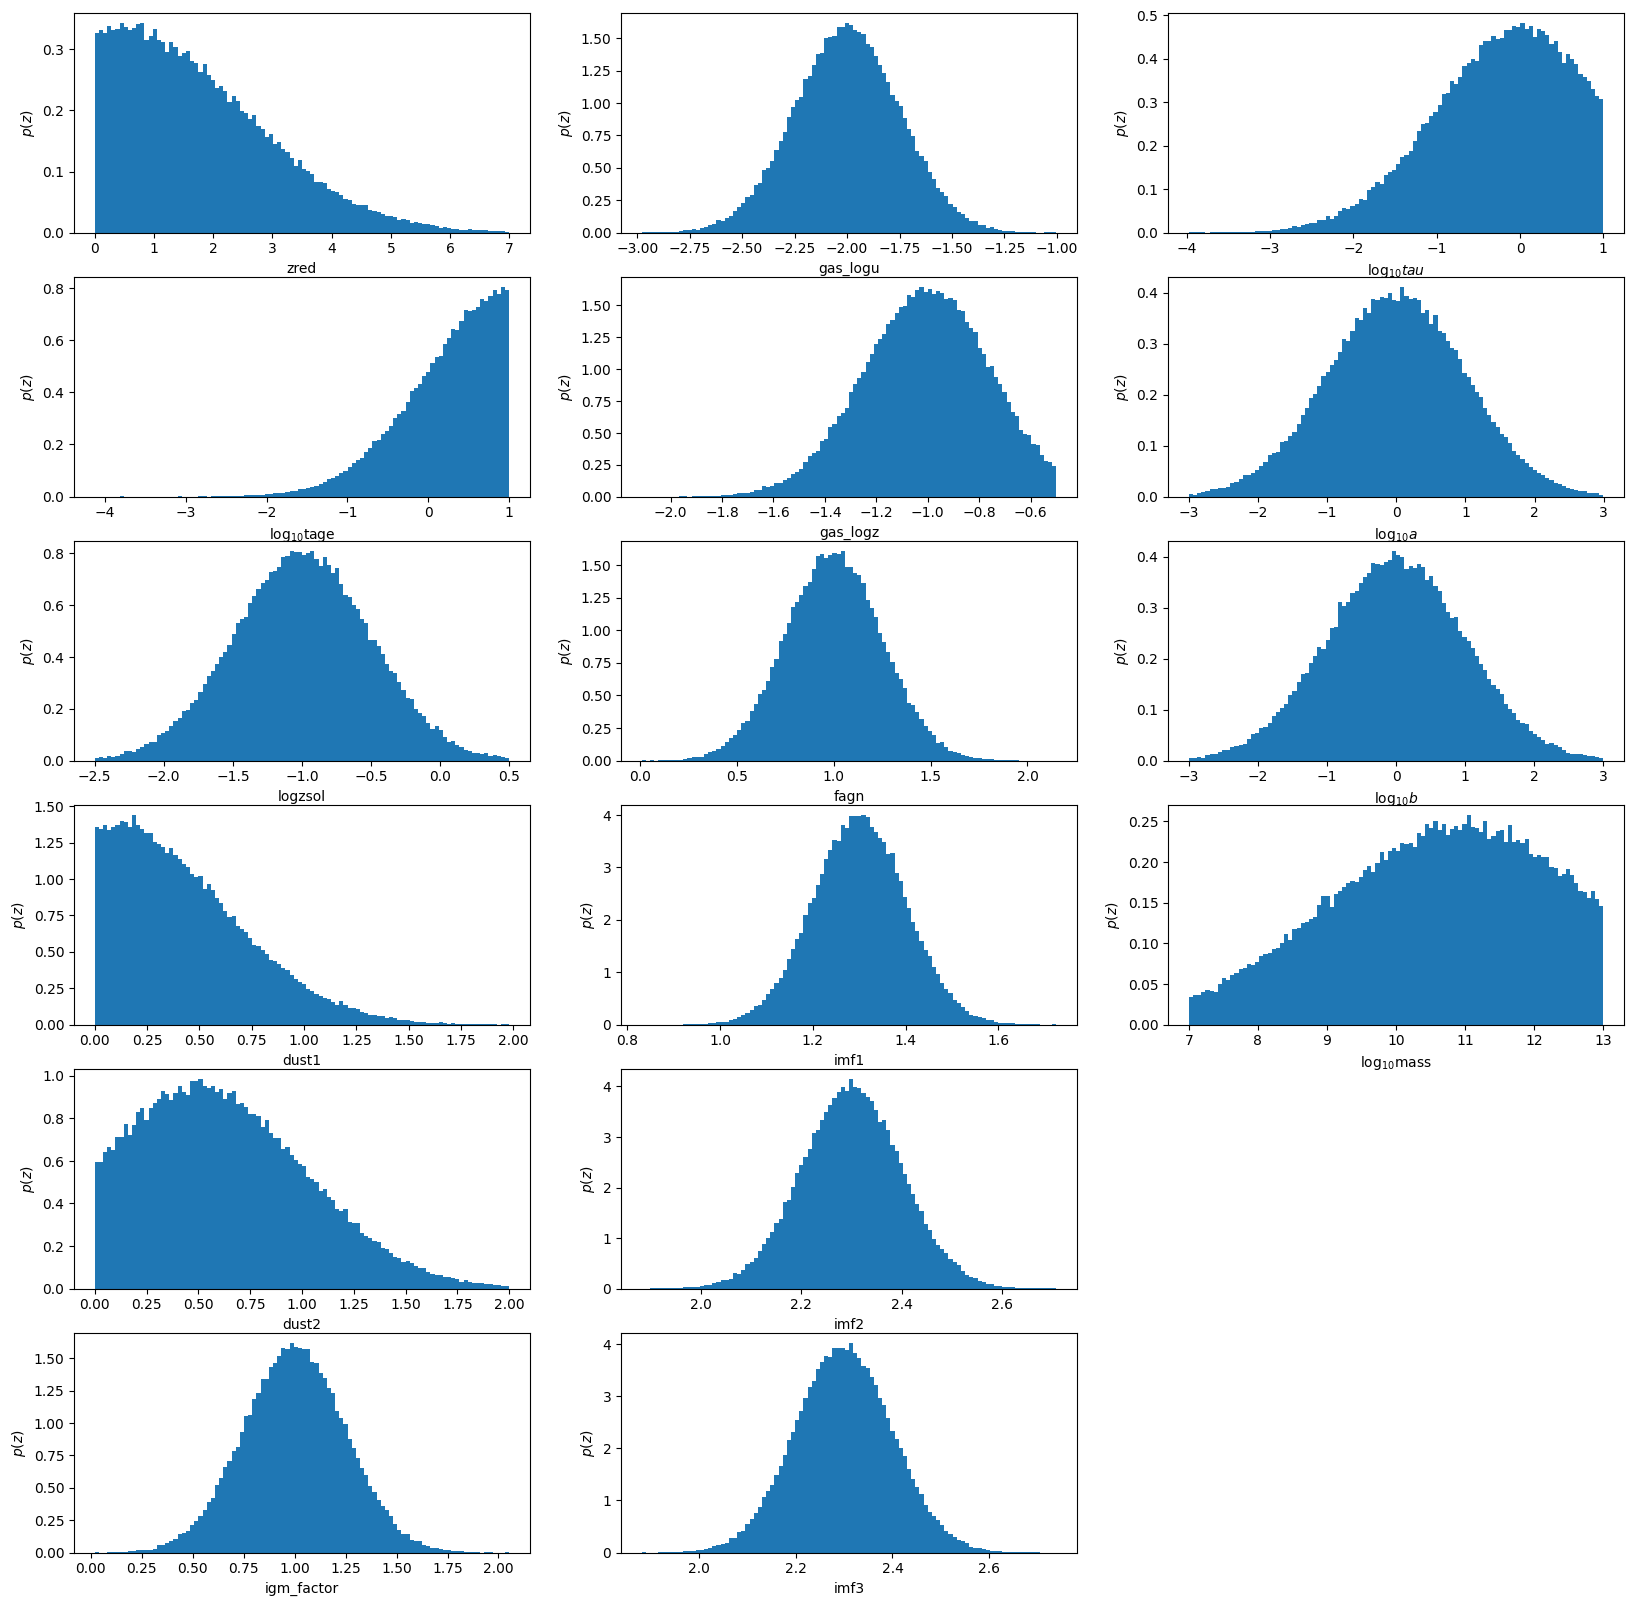

In [5]:
pop.plot_galaxy_population(100000, rows=6, nbins=100)